In [1]:
#Chain in LangGraph

In [2]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [3]:
from langchain_core.messages import HumanMessage,AIMessage

messages=[AIMessage(content="Hello! How can I assist you today?"),
          HumanMessage(content="Can you tell me a joke?")]

messages.append(AIMessage(content="Sure! Why don't scientists trust atoms? Because they make up everything!"))

for message in messages:
    print(f"{message.type}: {message.content}")

ai: Hello! How can I assist you today?
human: Can you tell me a joke?
ai: Sure! Why don't scientists trust atoms? Because they make up everything!


In [4]:
from langchain_groq   import ChatGroq
llm = ChatGroq(model="openai/gpt-oss-20b")
llm.invoke("hi")


AIMessage(content='Hello! 👋 How can I help you today?', additional_kwargs={'reasoning_content': 'The user says "hi". We should respond politely. Probably "Hello! How can I help you today?"'}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 72, 'total_tokens': 115, 'completion_time': 0.03824696, 'prompt_time': 0.004696397, 'queue_time': 0.053254983, 'total_time': 0.042943357}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_ebaf47239f', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--26ddcdd1-558b-46b5-afd6-0579b3875efc-0', usage_metadata={'input_tokens': 72, 'output_tokens': 43, 'total_tokens': 115})

In [5]:
def add(a:int,b:int)->int:
    """
    Adds two numbers.
    Args:
        a (int): first number
        b (int): second number
    Returns:
        int: sum of a and b
    """
    return a+b  

In [6]:
llm=llm.bind_tools([add])

In [7]:
llm.invoke("add 2 and 3")

AIMessage(content='', additional_kwargs={'reasoning_content': 'We need to call the function.', 'tool_calls': [{'id': 'fc_553b86b3-9fed-4666-983f-0eb16aac7f66', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 34, 'prompt_tokens': 157, 'total_tokens': 191, 'completion_time': 0.030356495, 'prompt_time': 0.010215375, 'queue_time': 0.046146115, 'total_time': 0.04057187}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_4c4aa6a4a4', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ce491d16-52fb-400c-8761-856fcac4ffbb-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 3}, 'id': 'fc_553b86b3-9fed-4666-983f-0eb16aac7f66', 'type': 'tool_call'}], usage_metadata={'input_tokens': 157, 'output_tokens': 34, 'total_tokens': 191})

In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages
from typing import Annotated
class State(TypedDict):
    messages: Annotated[list[AnyMessage],add_messages]
    

def llm_tool(state:State):
    return {"messages":[llm.invoke(state["messages"])]}



from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END
    
builder=StateGraph(State)

builder.add_node("llm_tool",llm_tool)
builder.add_edge(START,"llm_tool")

graph=builder.compile()

graph.invoke({"messages": "what is 2 + 2"})

{'messages': [HumanMessage(content='what is 2 + 2', additional_kwargs={}, response_metadata={}, id='539fbd04-ddd4-4ad6-b766-571390fda434'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'We need to compute 2+2. Use function add.', 'tool_calls': [{'id': 'fc_4ccc363c-d7f1-4e0c-9693-aa515ef3e9a3', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 40, 'prompt_tokens': 158, 'total_tokens': 198, 'completion_time': 0.035698677, 'prompt_time': 0.010288077, 'queue_time': 0.046020953, 'total_time': 0.045986754}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_ebaf47239f', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--212e24b2-f7ca-4b41-819f-fd2af47a9c1f-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'fc_4ccc363c-d7f1-4e0c-9693-aa515ef3e9a3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 158, 'output_tokens': 40

In [35]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

tools=[add]

builder=StateGraph(State)

builder.add_node("llm_tool",llm_tool)

builder.add_node("tools",ToolNode(tools))
builder.add_edge(START,"llm_tool")
builder.add_conditional_edges(
"llm_tool",

tools_condition


)
builder.add_edge("tools",END)
graph=builder.compile()



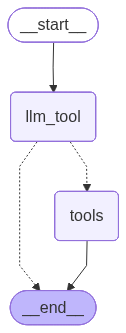

In [36]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [41]:
graph.invoke({'messages':"what is 2+2"} )

{'messages': [HumanMessage(content='what is 2+2', additional_kwargs={}, response_metadata={}, id='96997a6f-fbbb-42a6-8756-c95b233e703b'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'User asks "what is 2+2". We need to use the add function.', 'tool_calls': [{'id': 'fc_f458168e-77ee-4a6f-9c1f-147982ee017c', 'function': {'arguments': '{"a":2,"b":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 157, 'total_tokens': 202, 'completion_time': 0.040656066, 'prompt_time': 0.011901283, 'queue_time': 0.047694677, 'total_time': 0.052557349}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_ebaf47239f', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--6eca0f74-9fb8-4dde-8cf2-4b578b00772a-0', tool_calls=[{'name': 'add', 'args': {'a': 2, 'b': 2}, 'id': 'fc_f458168e-77ee-4a6f-9c1f-147982ee017c', 'type': 'tool_call'}], usage_metadata={'input_tokens': 157, 'outp

{'message': [HumanMessage(content='2=2', additional_kwargs={}, response_metadata={}, id='d8176fbc-d88b-4d3e-b788-c153022bcef8')]}